In [1]:
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)

# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

In [ ]:
import numpy as np
import math
import typing
from qiskit.visualization import plot_histogram

# Funciones auxiliares


In [3]:
class Circuit:
    def __init__(self, qu: int, cl: int):
        assert qu>0
        self.qu = qu
        self.cl = cl
        self.circuit = QuantumCircuit(qu, cl)

    # creates |010+> from '010+'
    @staticmethod
    def fromstr(qubits: str):
        circuit = Circuit(len(qubits))
        for i,qubit in enumerate(qubits):
            if qubit=='0':
                pass
            elif qubit=='1':
                circuit.x(i)
            elif qubit=='+':
                circuit.h(i)
            elif qubit=='-':
                circuit.x(i)
                circuit.h(i)
            else:
                raise Exception('Unexpected qubit')
        return circuit
    
    def u(self, th: float, ph: float, la: float, q: int):
        self.circuit.u(th, ph, la, q)
        return self
    
    def uc(self, th: float, ph: float, la: float, c: int, t: int):
        self.circuit.uc(th, ph, la, c, t)
        return self
    
    def swap(self, q1: int, q2: int):
        self.circuit.swap(q1, q2)
        return self
    
    def ccnot(self, c: int, t1: int, t2: int):
        self.circuit.ccnot(c, t1, t2)
        return self
    
    def cswap(self, c: int, t1: int, t2: int):
        self.circuit.cswap(c, t1, t2)
        return self
    
    def x(self, q: int):
        self.circuit.x(q)
        return self
    
    def h(self, q: int):
        self.circuit.h(q)
        return self
    
    def cnot(self, c: int, t: int):
        self.circuit.cnot(c, t)
        return self
    
    def draw(self):
        return self.circuit.draw()
    
    def measure(self, qs: list[int]):
        # Todo arreglar assert y verificar que la medicion devuelve solo los bits de qs (los pares)
        assert n <= self.n
        self.circuit.measure(qs, qs)
        job = execute(self.circuit, backend, shots=1)
        result = next(iter(job.result().get_counts()))
        return (int(result[:n], 2), Circuit.fromstr(result))
    
    def compose(self, self2: 'Circuit', qubits, clbits):
        self.circuit \
            .compose(self2.circuit, qubits, clbits, inplace=True)
        return self
    
    def compose(self, self2: 'Circuit'):
        circuit1, circuit2 = self.circuit, self2.circuit
        qu1, qu2 = self.qu, self2.qu
        cl1, cl2 = self.cl, self2.cl
        self.__init__(qu1+qu2, cl1+cl2)
        self.circuit \
            .compose(circuit1, inplace=True)
        self.circuit \
            .compose(circuit2, qubits=range(qu1, qu1+qu2), clbits=range(cl1, cl+cl2), inplace=True)
        return self

In [5]:
def letcase(result: (int, Circuit), cases):
    return cases[result[0]](result[1])

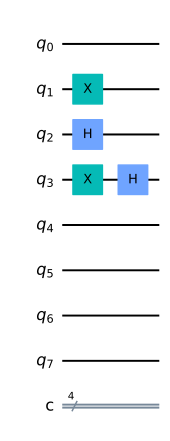

In [6]:
example = Circuit.fromstr('01+-')
example.draw()

|01+-> $\otimes$ |01+-> = |01+-01+->

# Programa para la expresión


$\text{prog} = \lambda x. \pi^2\mathbf{CNOT} ((\text{letcase } y = \pi^1Hx \text{ in }\{\text{|0>}, \text{|1>}\}) \otimes \text{|0>})$

In [7]:
prog = (lambda x:
    letcase(
        x.h(0).measure(1),
        [
            lambda y: Circuit(1),
            lambda y: Circuit(1).x(0),
        ]
    ).compose(Circuit(1)).cnot(0,1).measure(2)
)

$\text{exp} = \text{prog}\;\text{|1>}$

In [8]:
exp = prog(Circuit(1).x(0))
exp

(3, <__main__.Circuit at 0x7fb460d6e610>)